In [61]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime
import pytz
localtz = pytz.timezone('US/Eastern')

sns.set(style='white', palette='Set2')

df = pd.read_pickle('ml_conditions_plus.pkl')

df.index = df.index.tz_convert('US/Eastern')


print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature' 'as_o3' 'as_co'
 'as_h2s' 'sck_temperature' 'sck_humidity' 'forecastio_temperature_c'
 'avg_15_as_temperature' 'avg_60_forecastio_temperature_c'
 'derivative_sck_temperature' 'av

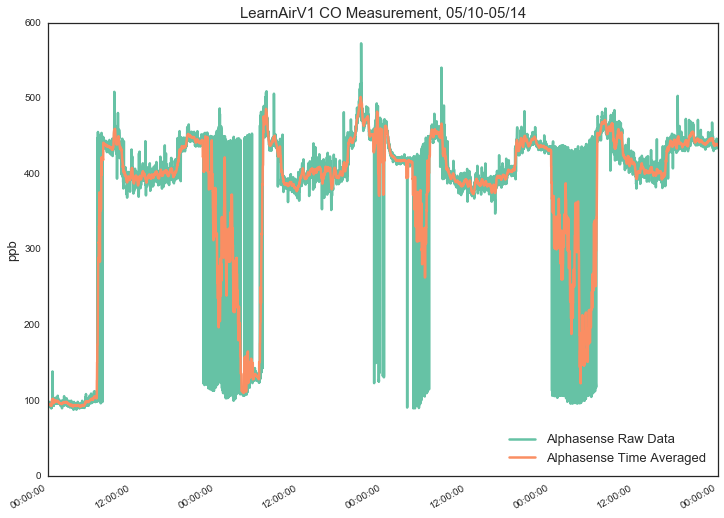

In [62]:
#co values - 
#    alphasense 'as_co' 
#    smartcitizen 'Carbon Monxide ( kOhm)'
#    epa 'co'

#need to calibrate alphasense, smartcitizen, then generate 10% accuracy plots


#1: JUSTIFY/ADD IN 15 MIN ROLLING AVERAGE FOR ALPHASENSE DATA

num_avg = 15

ref_col = 'as_co'
avg_col= 'avg_' + str(num_avg) + '_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()


starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value1 = ref_col
value2 = avg_col

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
    
plt.legend(['Alphasense Raw Data', 'Alphasense Time Averaged'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/as_co_raw.png', bbox_inches='tight', dpi=200)

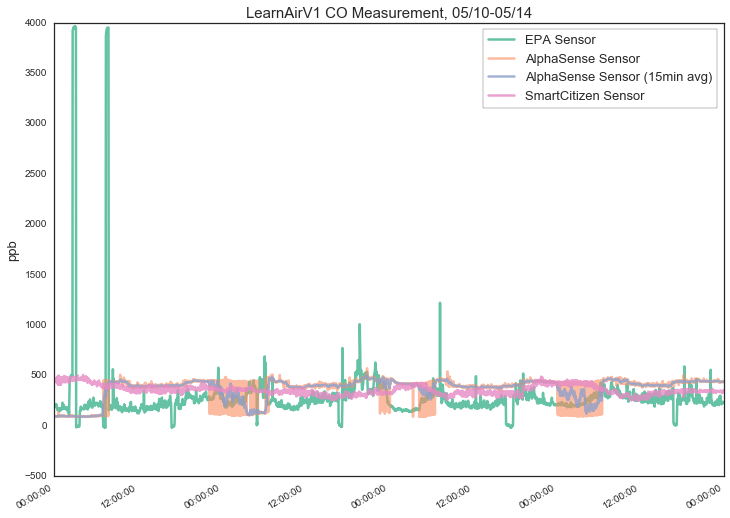

In [63]:
#we can see serious quantization issues here with the trace CO.  We will do a typical learning style on the averaged
#data, but to give the alphasense sensor a fair shake (not dependent on dynamic range/ADC error from 10 bit arduino)
#we'll also call things 'right' if they are in the correct bin.  Looking at this plot, we can see quantization at 
#100 and 400 ppb.  Assuming this gap of 300, we'll call it 'accurate' if it's within 150 ppb of the actual value
#(the quantization level) for the raw signal, and see what we get.

#2: PLOT OF RAW DATA

starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value1 = 'co'
value2 = 'as_co'
value3 = 'avg_15_as_co'
value4 = 'Carbon Monxide ( kOhm)'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.6)
if value3 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.8)
if value4 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value4].values*2, lw=2.5, alpha=0.8)
    
plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (15min avg)', 'SmartCitizen Sensor'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/co_zoomed.png', bbox_inches='tight', dpi=200)

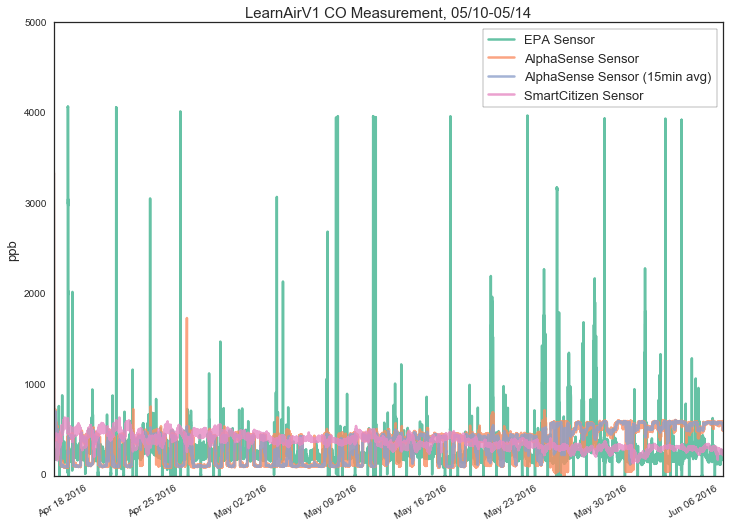

In [64]:
#2: PLOT OF RAW DATA

value1 = 'co'
value2 = 'as_co'
value3 = 'avg_15_as_co'
value4 = 'Carbon Monxide ( kOhm)'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=0.8)
if value3 is not None:
    plt.plot(df.index.values, df[value3].values, lw=2.5, alpha=0.8)
if value4 is not None:
    plt.plot(df.index.values, df[value4].values*2, lw=2.5, alpha=0.8)
   
plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (15min avg)', 'SmartCitizen Sensor'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement, 05/10-05/14', fontsize=15)
plt.ylim(-10,5000)
plt.savefig('./figs/co.png', bbox_inches='tight', dpi=200)

In [65]:
#need to add hour_of_day as a machine learning field 
df['hour_of_day'] = df.index.hour
df['day_of_year'] = [dtime.timetuple().tm_yday for dtime in df.index]

df['morning'] = [1 if (hr>=7 and hr<=11) else 0 for hr in df['hour_of_day']] #7-11:59
df['afternoon'] = [1 if (hr>=12 and hr<=15) else 0 for hr in df['hour_of_day']] #12-15:59
df['evening'] = [1 if (hr>=16 and hr<=18) else 0 for hr in df['hour_of_day']] #16-18:59

df['morning_rush'] = [1 if (hr>=8 and hr<=9) else 0 for hr in df['hour_of_day']] #8-9:59
df['lunch'] = [1 if (hr>=12 and hr<=13) else 0 for hr in df['hour_of_day']] #12-13:59
df['evening_rush'] = [1 if (hr>=17 and hr<=18) else 0 for hr in df['hour_of_day']] #17-18:59

df['day'] = [1 if (hr>=7 and hr<=18) else 0 for hr in df['hour_of_day']] #7a-18:59 approx
df['night'] = [1 if (hr>=19 or hr<=6) else 0 for hr in df['hour_of_day']] #19-7 approx

df.head()

,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp,min_since_plugged_in,...,hour_of_day,day_of_year,morning,afternoon,evening,morning_rush,lunch,evening_rush,day,night
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-04-15 06:13:00-04:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000,0,...,6,106,0,0,0,0,0,0,0,1
2016-04-15 06:14:00-04:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279,1,...,6,106,0,0,0,0,0,0,0,1
2016-04-15 06:15:00-04:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197,2,...,6,106,0,0,0,0,0,0,0,1
2016-04-15 06:16:00-04:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000,3,...,6,106,0,0,0,0,0,0,0,1
2016-04-15 06:17:00-04:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000,4,...,6,106,0,0,0,0,0,0,0,1


/Library/Python/2.7/site-packages/ipykernel/__main__.py:24: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [ 0.54821077  0.51713852]

TNC minimization= [  0.5         74.63352188]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 9094257879.87
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 348.31000281
after optimization rmse = 298.954004026


/Library/Python/2.7/site-packages/ipykernel/__main__.py:67: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [ 0.56914148  0.35088394]

TNC minimization= [  0.5         74.78494697]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 8669547967.74
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 340.079568692
after optimization rmse = 296.061643471


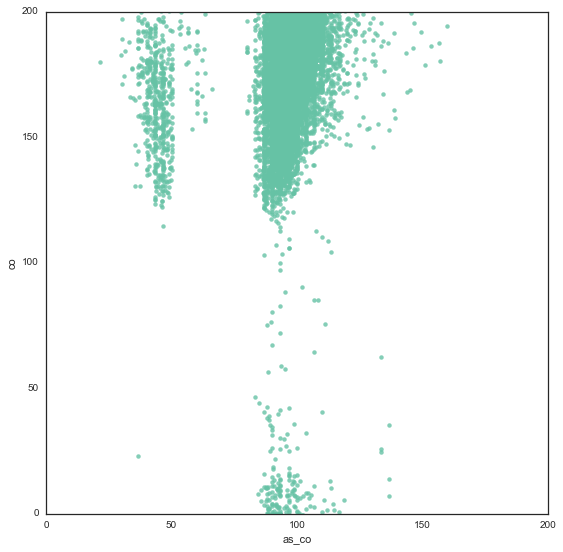

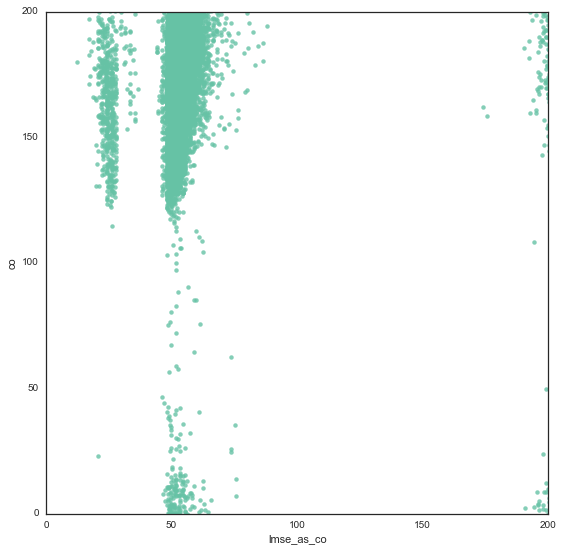

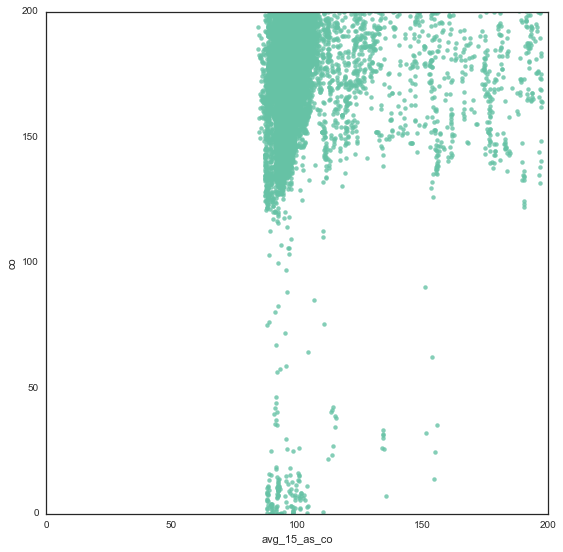

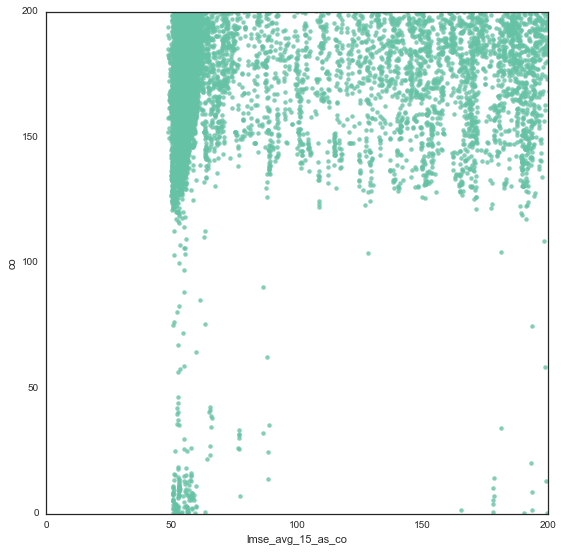

In [39]:
#3 LMSE ALPHASENSE DATA RAW 
'''

#RMS fit - scale factor and offset

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'co'
scaled_col = 'as_co'
new_col = 'lmse_as_co'

bnds = ((0.5, 1.5), (-200, 200))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse


ref_col = 'co'
scaled_col = 'avg_15_as_co'
new_col = 'lmse_avg_15_as_co'

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse

'''

mean = 345.221310636, std = 194.510475693
mean = 344.9259475, std = 179.626066357
mean = 247.24314928, std = 275.116283116
COBYLA minimization= [ 0.51905462  0.04080867]



/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: OptimizeWarning: Unknown solver options: xtol


TNC minimization= [ 0.5        8.7485802]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1788126245.6
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 154.447684994
after optimization rmse = 128.80281019
COBYLA minimization= [ 0.54125801  0.05605524]

TNC minimization= [  0.5         23.13845699]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 259836567.777
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 5
SLSQP minimization= [  0.42686166  53.52960307]



/Library/Python/2.7/site-packages/ipykernel/__main__.py:84: OptimizeWarning: Unknown solver options: xtol


original rmse = 152.127896166
after optimization rmse = 123.571726534
after optimization comparison rmse = 296.320150765


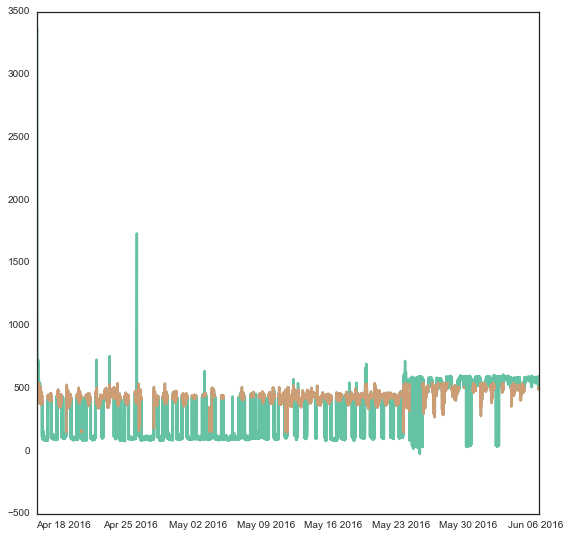

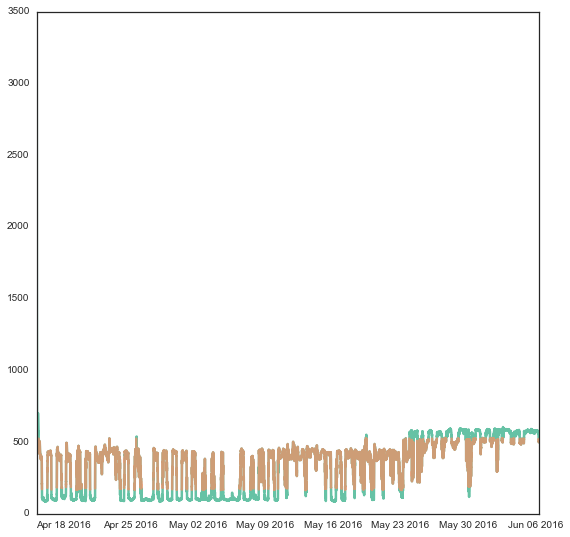

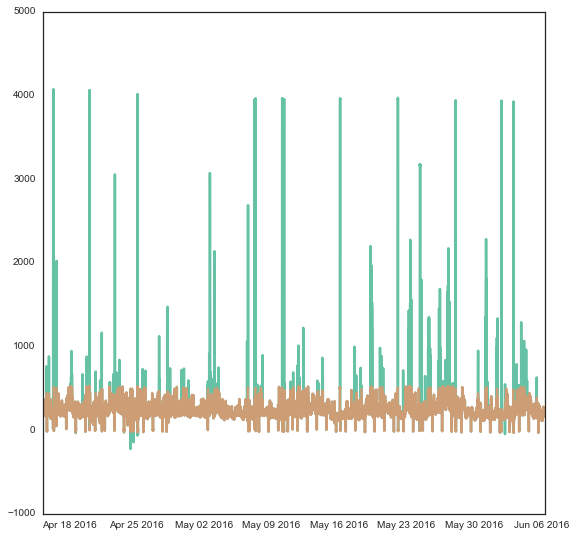

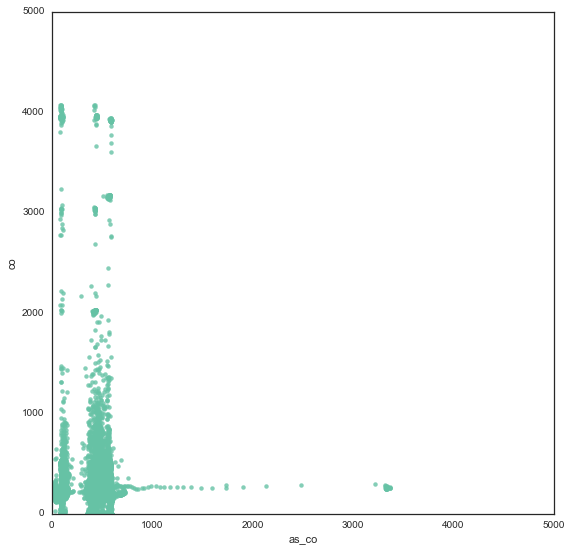

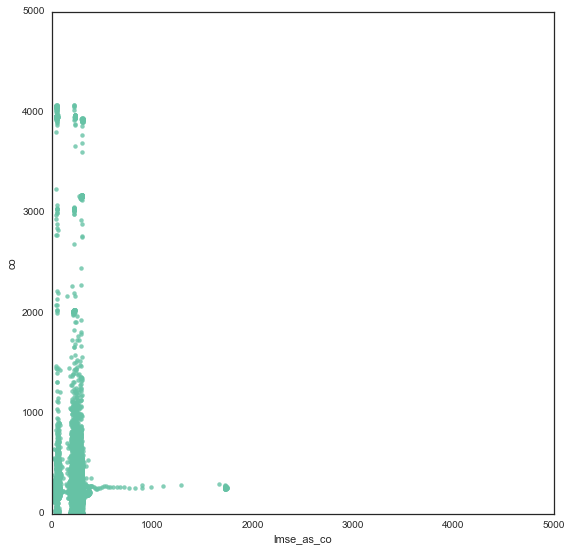

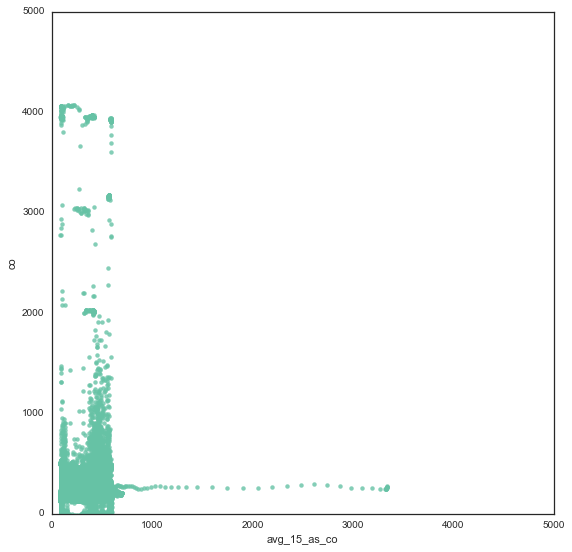

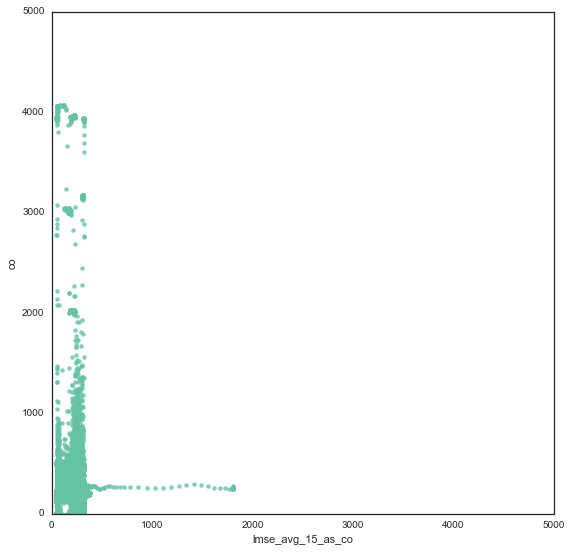

In [59]:
#SAME AS PREVIOUS BLOCK - this time we're trying throwing away outliers- only using values 1 stdev from mean 
# in each set as training data for RMS error, to mitigate effects of big spikes

'''
#could just LMSE scale and offset

#RMS fit - scale factor and offset

#go through each as_o3, lmse_as_o3, and o3, find mean/stdev, and replace anything above 1 stdev with np.nan
cols = ['as_co', 'avg_15_as_co', 'co']

for col in cols:
    mean = df[col].mean()
    stdev = df[col].std()
    print 'mean = %s, std = %s' % (mean, stdev)
    
    df[col + '_removedoutliers'] = [val if val > mean-stdev and val < mean+stdev else np.nan for val in df[col]]
    
    fig, ax = plt.subplots(figsize=(9, 9))
    plt.plot_date(df.index.values, df[col].values, tz=localtz, ls='solid', marker=None, lw=2.5)
    plt.plot(df.index.values, df[col + '_removedoutliers'].values, lw=2.5, alpha=.7) 


#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'co'
scaled_col = 'as_co'
new_col = 'lmse_as_co'

bnds = ((0.5, 1.5), (-200, 200))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col + '_removedoutliers'].values + x[1]) - df[ref_col +  '_removedoutliers'].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,5000)
plt.xlim(0,5000)


total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,5000)
plt.xlim(0,5000)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse


ref_col = 'co'
scaled_col = 'avg_15_as_co'
new_col = 'lmse_avg_15_as_co'

total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col + '_removedoutliers'].values + x[1]) - df[ref_col + '_removedoutliers'].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,5000)
plt.xlim(0,5000)


total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,5000)
plt.xlim(0,5000)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization comparison rmse = %s' % total_rmse

for col in cols:
    df.drop(col + '_removedoutliers', axis=1, inplace=True)

'''


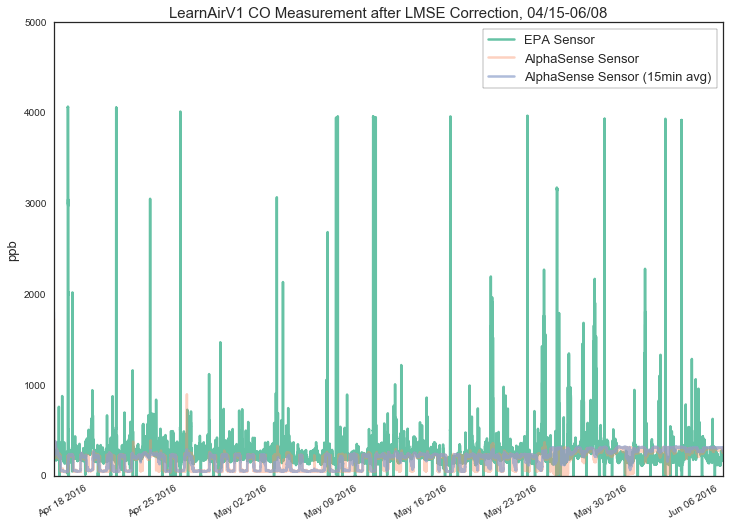

In [60]:
'''
value1 = 'co'
value2 = 'lmse_as_co'
value3 = 'lmse_avg_15_as_co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=.4)
if value3 is not None:
    plt.plot(df.index.values, df[value3].values, lw=2.5, alpha=.7)   

plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (15min avg)'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement after LMSE Correction, 04/15-06/08', fontsize=15)
plt.ylim(0,5000)

plt.savefig('./figs/co_lmse_fit.png', bbox_inches='tight', dpi=200)
'''

/Library/Python/2.7/site-packages/ipykernel/__main__.py:44: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [ 271.0774889   270.71374471]

TNC minimization= [ 270.18578585  269.82220157]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8508900874.12
            Iterations: 5
            Function evaluations: 56
            Gradient evaluations: 5
SLSQP minimization= [ 270.14291207  269.77932647]

original rmse = 348.31000281
after optimization rmse = 336.913991094


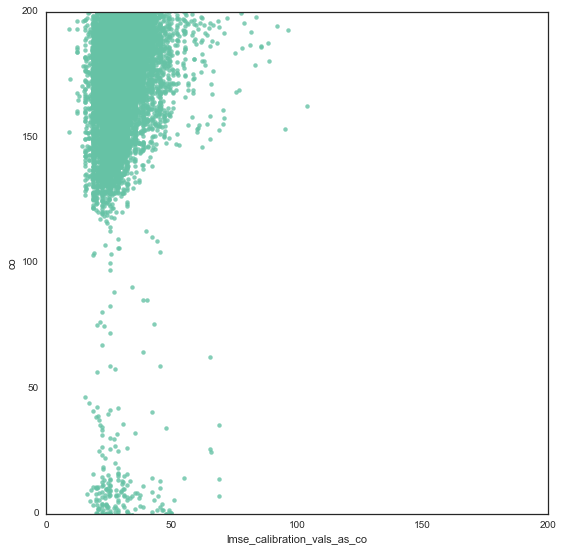

In [68]:
#previous standard LMSE calibration total garbage, even with bounds.  Let's do calibration LMSE.

#4 LMSE ALPHASENSE CALIBRATION

'''
#alphasensor #2 = CO
we_zero = 260.0 #mV
ae_zero = 280.0 #mV
'''

sensitivity = 0.300 #mV/ppb
n_temps = [15, 25] #degrees C that seperate n regimes
n= [1.0, -1.0, -.76] #n values that correspond to n_temps [<n_temps[0], between n_temps[0],n_temps[1], >n_temps[1]]

def compute_co_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity):
    if temp < n_temps[0]:
        return ((we - we_zero) - (n[0]*ae - ae_zero)) / sensitivity
    elif temp < n_temps[1]:
        return ((we - we_zero) - (n[1]*ae - ae_zero)) / sensitivity
    else:
        return ((we - we_zero) - (n[2]*ae - ae_zero)) / sensitivity

ref_col = 'co'
new_col = 'lmse_calibration_vals_as_co'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df['as_co'].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    #return np.nansum(([compute_co_val(n_temps, n, temp, we, x[0], ae, x[1], x[2]) for we, ae, temp in \
    #                 zip(df['alphaS2_work'], df['alphaS2_aux'], df['as_temperature'])]- df[ref_col].values)**2)
    return np.nansum(([compute_co_val(n_temps, n, temp, we, x[0], ae, x[1], sensitivity) for we, ae, temp in \
                     zip(df['alphaS2_work'], df['alphaS2_aux'], df['avg_15_as_temperature'])]- df[ref_col].values)**2)

#x0 = np.array([260.,280.,0.3])
#bnds = ((210, 310), (230, 330), (0.2,0.4))

x0 = np.array([260.,280.])
bnds = ((210, 310), (230, 330))


res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

#df[new_col] = [compute_co_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], res.x[2]) \
#                    for we, ae, temp in zip(df['alphaS2_work'], df['alphaS2_aux'], df['as_temperature'])]
df[new_col] = [compute_co_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], sensitivity) \
                    for we, ae, temp in zip(df['alphaS2_work'], df['alphaS2_aux'], df['avg_15_as_temperature'])]


fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df['as_co'].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse



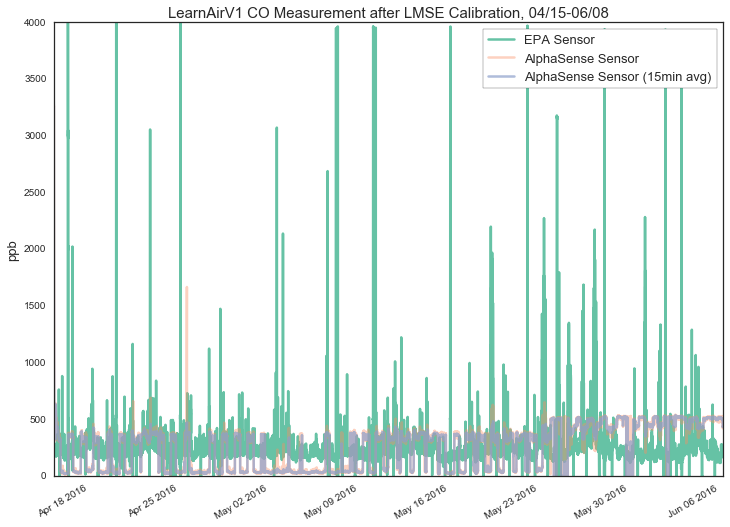

In [69]:
#5 LMSE SMARTCITIZEN DATA

#create 15min avg of new alphasense co reading (fit with new calibration)
num_avg = 15

ref_col = 'lmse_calibration_vals_as_co'
avg_col= 'avg_15_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()


value1 = 'co'
value2 = 'lmse_calibration_vals_as_co'
value3 = 'avg_15_lmse_calibration_vals_as_co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=.4)
if value3 is not None:
    plt.plot(df.index.values, df[value3].values, lw=2.5, alpha=.7)   

plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (15min avg)'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement after LMSE Calibration, 04/15-06/08', fontsize=15)
plt.ylim(0,4000)

plt.savefig('./figs/co_lmse_calibration.png', bbox_inches='tight', dpi=200)

4068.65
152.574375
Alphasense vs. EPA CO Readings, 7.5% accuracy
correct readings= 27259
incorrect readings = 47702
4068.65
152.574375
15min Avg Alphasense vs. EPA CO Readings, 7.5% accuracy
correct readings= 30662
incorrect readings = 44299
4068.65
152.574375
LMSE Calibration Alphasense vs. EPA CO Readings, 7.5% accuracy
correct readings= 27649
incorrect readings = 47312
4068.65
152.574375
LMSE Calibration, 15-min Avg Alphasense vs. EPA CO Readings, 7.5% accuracy
correct readings= 28731
incorrect readings = 46230


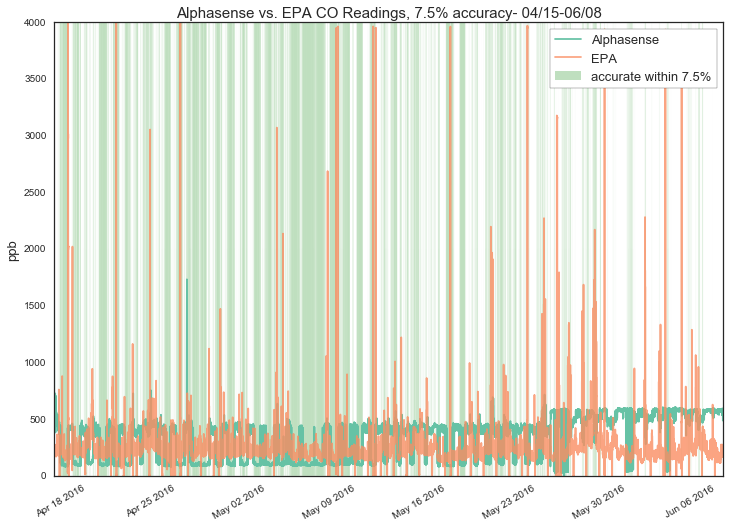

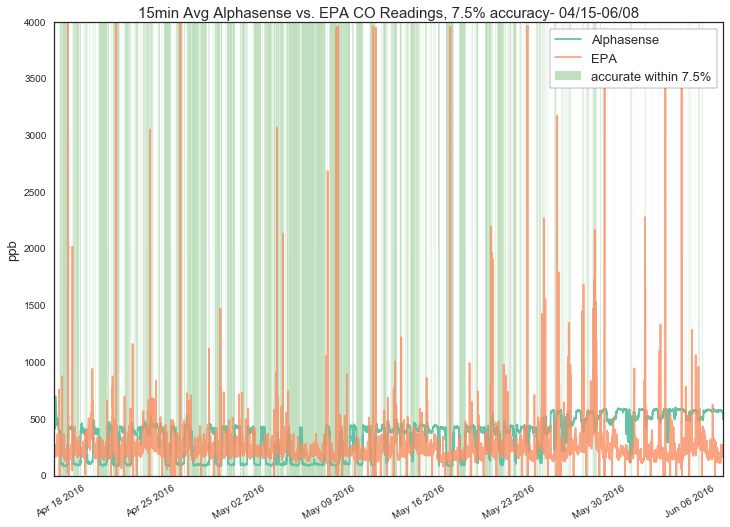

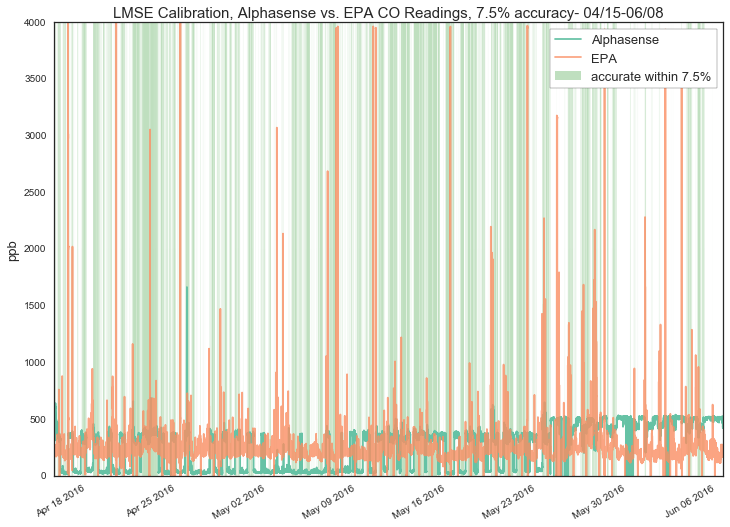

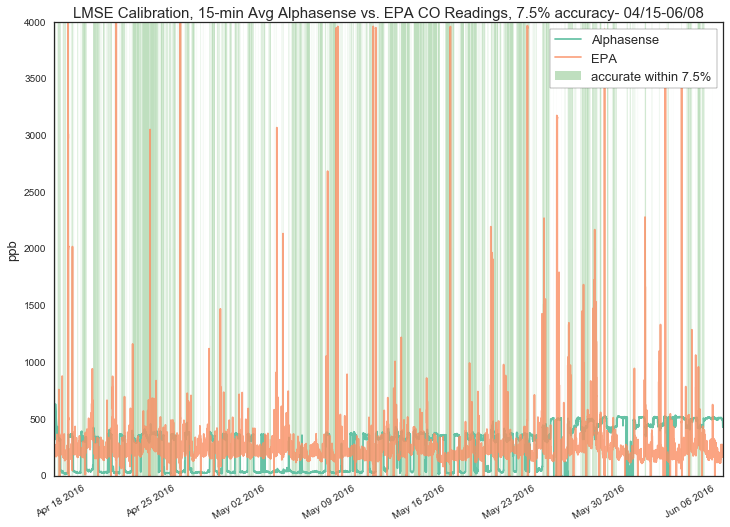

In [76]:
#6 7.5% ACCURACY FOR ALPHASENSE

#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'as_co'
ref_col = 'co'
accurate_col = 'as_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df[main_col])
plt.plot(df[ref_col], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('Alphasense vs. EPA CO Readings, 7.5% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense', 'EPA', 'accurate within 7.5%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,4000)

print 'Alphasense vs. EPA CO Readings, 7.5% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())






#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'avg_15_as_co'
ref_col = 'co'
accurate_col = 'avg_15_as_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df[main_col])
plt.plot(df[ref_col], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('15min Avg Alphasense vs. EPA CO Readings, 7.5% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense', 'EPA', 'accurate within 7.5%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,4000)

print '15min Avg Alphasense vs. EPA CO Readings, 7.5% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())









#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'lmse_calibration_vals_as_co'
ref_col = 'co'
accurate_col = 'lmse_calibration_vals_as_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df[main_col])
plt.plot(df[ref_col], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('LMSE Calibration, Alphasense vs. EPA CO Readings, 7.5% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense', 'EPA', 'accurate within 7.5%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,4000)

print 'LMSE Calibration Alphasense vs. EPA CO Readings, 7.5% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())






#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'avg_15_lmse_calibration_vals_as_co'
ref_col = 'co'
accurate_col = 'avg_15_lmse_calibration_vals_as_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df[main_col])
plt.plot(df[ref_col], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('LMSE Calibration, 15-min Avg Alphasense vs. EPA CO Readings, 7.5% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense', 'EPA', 'accurate within 7.5%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,4000)

print 'LMSE Calibration, 15-min Avg Alphasense vs. EPA CO Readings, 7.5% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())


In [ ]:
#don't forget the justification that 300ppb (plus/minus 150ppb, which is what we're using here with 7.5%) is motivated
#by quantization level in previous steps

/Library/Python/2.7/site-packages/ipykernel/__main__.py:23: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [   0.24588056  198.82802152]

TNC minimization= [   2.         -121.60600854]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 258987528787.0
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [  10.  200.]

original rmse = 285.481764304
after optimization rmse = 286.951966485


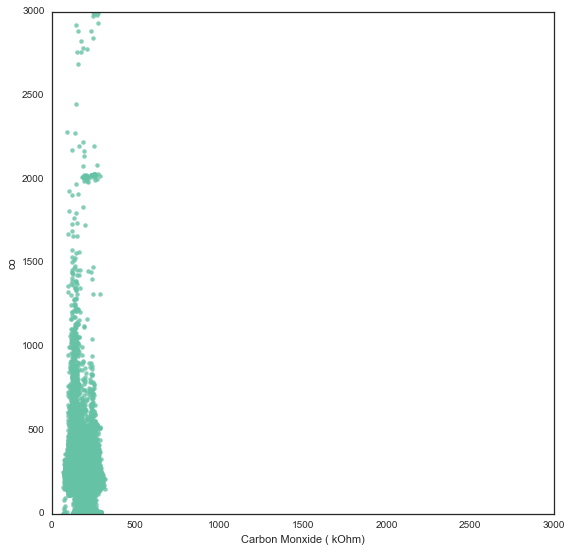

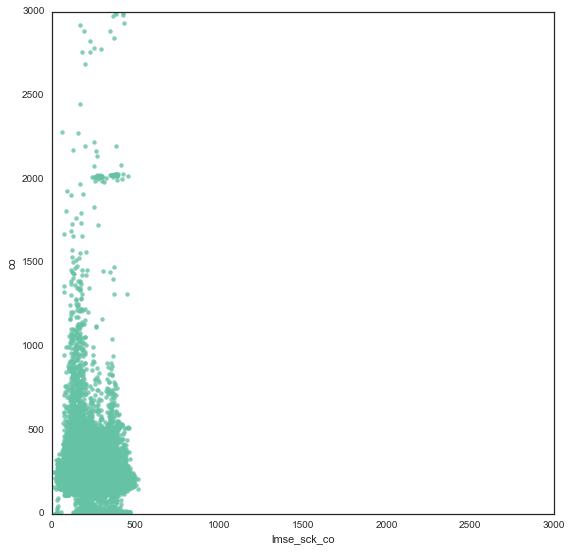

In [90]:
#8 LMSE RE-CAL SMARTCITIZEN DATA 

#RMS fit - scale factor and offset

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'co'
scaled_col = 'Carbon Monxide ( kOhm)'
new_col = 'lmse_sck_co'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([10.,200.])
bnds = ((2, 20), (-1000, 1000))

res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res2.x[0]+res2.x[1]


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,3000)
plt.xlim(0,3000)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,3000)
plt.xlim(0,3000)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse


(0, 4000)

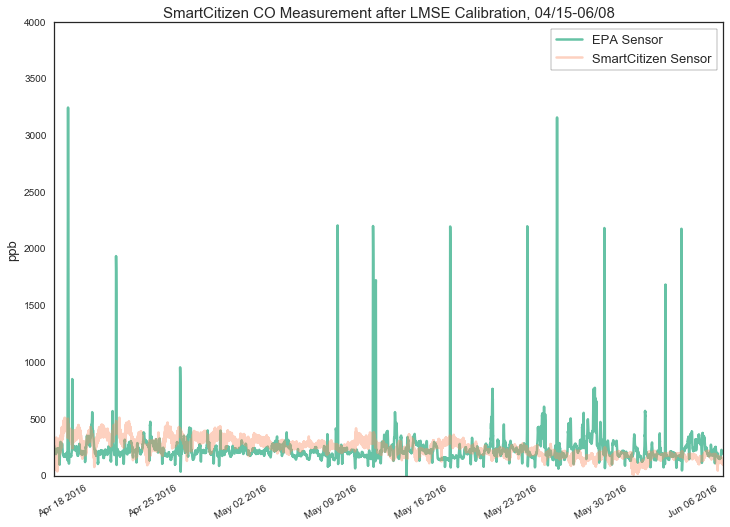

In [93]:
#9 10% ACCURACY FOR SMARTCITIZEN

num_avg = 60

ref_col = 'co'
avg_col= 'avg_' + str(num_avg) + '_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()


value1 = 'avg_60_co'
value2 = 'lmse_sck_co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=.4)

plt.legend(['EPA Sensor', 'SmartCitizen Sensor'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('SmartCitizen CO Measurement after LMSE Calibration, 04/15-06/08', fontsize=15)
plt.ylim(0,4000)


In [ ]:
#says on datasheet ppm, we're in ppb here 1ppm=1000ppb.  

#10 RESAVE